In [10]:
import sys
import importlib
import numpy as np
import matplotlib.pyplot as plt
if sys.path[-1] != "..": sys.path.append("..")
import model
from common import cosmology, rh_neutrino
model = importlib.reload(model)

In [16]:
H_inf = 2e10
Gamma_phi = 1e8
g = 1.0

In [21]:
chi0 = 1e7  # fakes m_a
f_a = 1e6
# f_a < chi0
m_chi = 1e6
m_a = 1e5

In [22]:
def calc_effective_mass(coupling, other_field, fundermental_mass):
    return np.sqrt(fundermental_mass**2 + coupling * other_field**2)

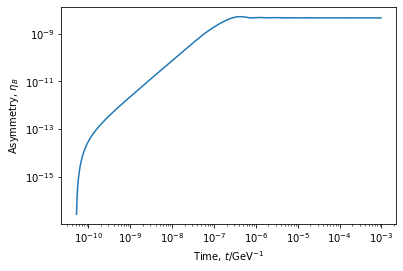

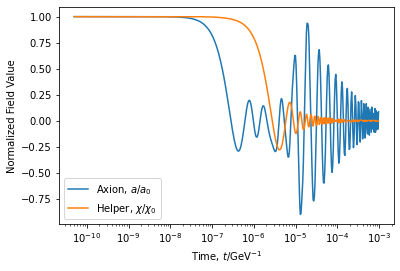

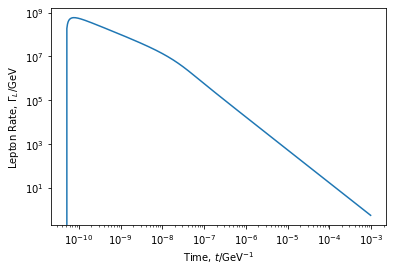

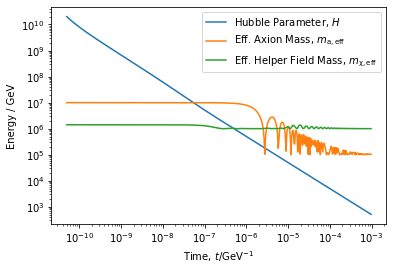

In [23]:
sol = model.simulate(m_a, f_a, Gamma_phi, H_inf, chi0, m_chi, g=g, converge=False, end=1e-3)

plt.loglog(sol.t, cosmology.n_L_to_eta_B_final(sol.T, sol.n_L))
plt.xlabel(r"Time, $t / \mathrm{GeV}^{-1}$")
plt.ylabel(r"Asymmetry, $\eta_B$")
plt.show()

plt.semilogx(sol.t, sol.theta, label=r"Axion, $a / a_0$")
plt.semilogx(sol.t, sol.chi / chi0, label=r"Helper, $\chi / \chi_0$")
plt.xlabel(r"Time, $t / \mathrm{GeV}^{-1}$")
plt.ylabel(r"Normalized Field Value")
plt.legend()
plt.show()

sigma_eff = rh_neutrino.paper_sigma_eff
plt.loglog(sol.t, rh_neutrino.calc_Gamma_L(sol.T, sigma_eff))
plt.xlabel(r"Time, $t / \mathrm{GeV}^{-1}$")
plt.ylabel(r"Lepton Rate, $\Gamma_L / \mathrm{GeV}$")
plt.show()

plt.loglog(sol.t, sol.H, label=r"Hubble Parameter, $H$")
plt.loglog(sol.t, calc_effective_mass(g, sol.chi, m_a), label=r"Eff. Axion Mass, $m_\mathrm{a,eff}$")
plt.loglog(sol.t, calc_effective_mass(g, f_a * sol.theta, m_chi), 
           label=r"Eff. Helper Field Mass, $m_\mathrm{\chi,eff}$")
plt.xlabel(r"Time, $t / \mathrm{GeV}^{-1}$")
plt.ylabel("Energy / GeV")
plt.legend()
plt.show()

In [ ]:
m_a_range = Gamma_phi_range = np.geomspace(min_val, H_inf, 20)
eta_B = np.array([[model.compute_B_asymmetry(m_a, f_a, Gamma_phi, H_inf, chi0) 
                   for m_a in m_a_range] for Gamma_phi in Gamma_phi_range])

In [24]:
def minimal_axion_mass_from_decay(f_a):
    return 8e4 * (f_a / 1e15)**(2/3)

In [26]:
"%e" % minimal_axion_mass_from_decay(f_a)

'8.000000e-02'